In [1]:
import os 
import re 
import pandas as pd 
import tensorflow as tf 
from tensorflow.keras import utils 
data_set = tf.keras.utils.get_file( fname="imdb.tar.gz", #download file name 
                                   origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", 
                                   extract = True )

84140032/84125825 [==============================] - 4s 0us/step


In [2]:
data_set

'/root/.keras/datasets/imdb.tar.gz'

In [3]:
def directory_data(directory): 
  data = {} 
  data["review"] = [] 
  for file_path in os.listdir(directory): 
    with open(os.path.join(directory, file_path), "r", encoding='utf-8') as file: 
      data["review"].append(file.read()) 
  return pd.DataFrame.from_dict(data)

In [4]:
def data(directory): 
  pos_df = directory_data(os.path.join(directory, "pos")) 
  neg_df = directory_data(os.path.join(directory, "neg")) 
  pos_df["sentiment"] = 1 
  neg_df["sentiment"] = 0 
  return pd.concat([pos_df, neg_df])

In [5]:
train_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "train")) 
test_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "test"))

In [8]:
train_df.head()
reviews = list(train_df['review'])

# 문자열 문장 리스트를 토큰화
tokenized_reviews = [r.split() for r in reviews]
#토큰화된 리스트에 대 한 각 길이를 저장
review_len_by_token = [len(t) for t in tokenized_reviews]
# 토큰화된 것을 붙여서 음절의 길이를 저장
review_len_by_alphabet = [len(s.replace(' ','')) for s in reviews]

Text(0, 0.5, 'Number of Reviews')

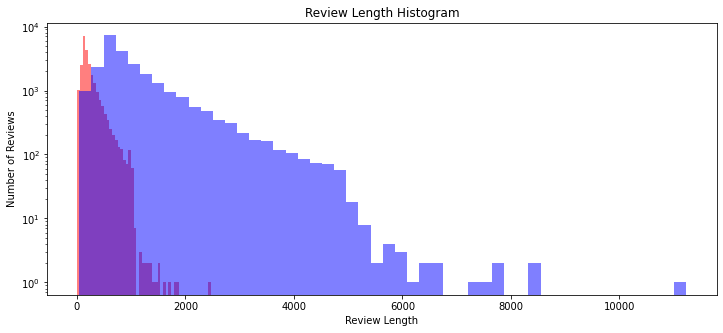

In [12]:
import matplotlib.pyplot as plt
#이미지 사이즈 선언
plt.figure(figsize=(12,5))
plt.hist(review_len_by_token, bins = 50, alpha = 0.5, color = 'r', label = 'word')
plt.hist(review_len_by_alphabet, bins = 50, alpha = 0.5, color = 'b', label = 'alphabet')
plt.yscale('log', nonposy='clip')

plt.title('Review Length Histogram')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')

{'boxes': [<matplotlib.lines.Line2D at 0x7fc7d4503a90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc7d450bb50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc7d451d110>],
 'means': [<matplotlib.lines.Line2D at 0x7fc7d4513b90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc7d4513650>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc7d450b0d0>,
  <matplotlib.lines.Line2D at 0x7fc7d450b610>]}

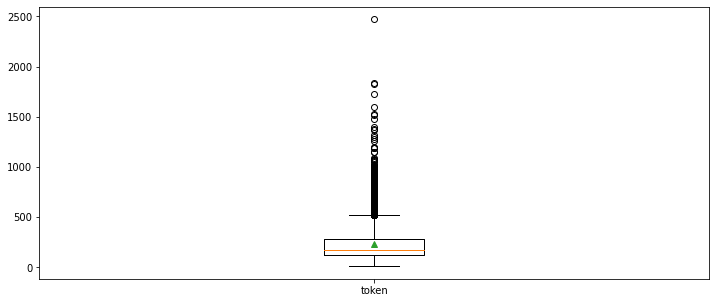

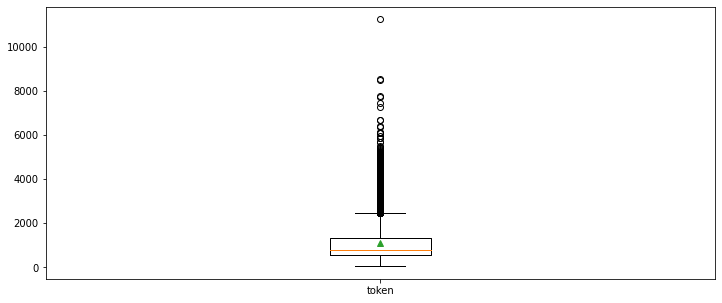

In [14]:
plt.figure(figsize=(12,5))
plt.boxplot([review_len_by_token],labels=['token'],showmeans=True)

plt.figure(figsize=(12,5))
plt.boxplot(review_len_by_alphabet,labels=['token'],showmeans=True)

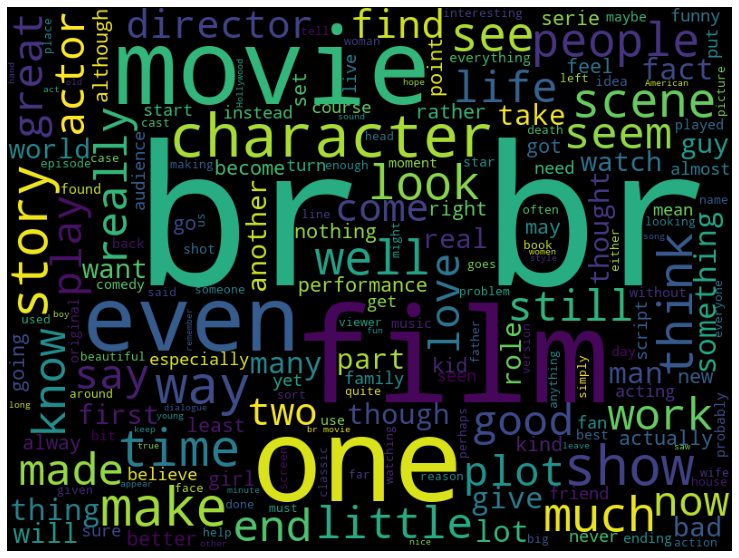

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', width= 800, height = 600).generate(' '.join(train_df['review']))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment = train_df['sentiment']